# KNN with Grid Search


### Data Set Information:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

### Mission:
The mission is to create a model that predicts whether the tumor is malignant (type 4) or benign (type 2).



### Attribute Information:

- 1. Sample code number: id number 
- 2. Clump Thickness: 1 - 10 
- 3. Uniformity of Cell Size: 1 - 10 
- 4. Uniformity of Cell Shape: 1 - 10 
- 5. Marginal Adhesion: 1 - 10 
- 6. Single Epithelial Cell Size: 1 - 10 
- 7. Bare Nuclei: 1 - 10 
- 8. Bland Chromatin: 1 - 10 
- 9. Normal Nucleoli: 1 - 10 
- 10. Mitoses: 1 - 10 
- 11. Class: (2 for benign, 4 for malignant)

## Goals of this ipynb
In this notebook we will:
- Import data and name the columns
- Utilize Grid Search to identify the hyper paramaters for the best model
- Use the best model to make predictions and find the nearest neighbors to confirm its accuracy
- Report the accuracy scores of the best model


In [129]:
# import packages
import pandas as pd
import numpy as np
import sklearn.linear_model 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
% matplotlib inline

from sklearn.model_selection import train_test_split

from random import seed  

In [131]:
# The data has no header
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None, sep=',')

In [132]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [238]:
# Class Class: (2 for benign, 4 for malignant)

df = pd.read_csv('breast-cancer-wisconsin.csv', delimiter=",",header=None, \
                 names = ['ID', 'Clump_Thickness', 'Uniformity_C_Size',\
                          'Uniformity_C_Shape', 'marg_adhesion', 'single_epthelial_size', \
                          'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', \
                          'type'])
df.head()


    

,ID,Clump_Thickness,Uniformity_C_Size,Uniformity_C_Shape,marg_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,type
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [239]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_C_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_C_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marg_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_epthelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitosis,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
type,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                       699 non-null int64
Clump_Thickness          699 non-null int64
Uniformity_C_Size        699 non-null int64
Uniformity_C_Shape       699 non-null int64
marg_adhesion            699 non-null int64
single_epthelial_size    699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitosis                  699 non-null int64
type                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Convert bare_nuclei from str to float

In [241]:
# bare_nuclei has a value we need to replace:'?' 
df.bare_nuclei.value_counts().sort_index()


1     402
10    132
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
?      16
Name: bare_nuclei, dtype: int64

In [242]:
# value 1 is a large majority of the attribute. We cold replace it with a '1'. But for this project we will replace with -99999 to indicate an unknown
df.bare_nuclei.replace('?', -99999, inplace=True)

In [243]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', -99999, '5', '8', '6'],
      dtype=object)

In [244]:
df.bare_nuclei = df.bare_nuclei.astype(int)

In [245]:
df.dtypes

ID                       int64
Clump_Thickness          int64
Uniformity_C_Size        int64
Uniformity_C_Shape       int64
marg_adhesion            int64
single_epthelial_size    int64
bare_nuclei              int64
bland_chromatin          int64
normal_nucleoli          int64
mitosis                  int64
type                     int64
dtype: object

In [246]:
# Check for Nan
df.isnull().sum()

ID                       0
Clump_Thickness          0
Uniformity_C_Size        0
Uniformity_C_Shape       0
marg_adhesion            0
single_epthelial_size    0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitosis                  0
type                     0
dtype: int64

In [247]:
# check to see how each outcome is represented
df.type.value_counts()

2    458
4    241
Name: type, dtype: int64

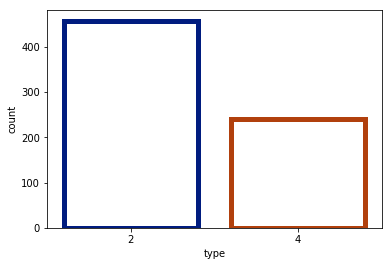

In [248]:
import seaborn as sns

ax = sns.countplot(x="type", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                edgecolor=sns.color_palette("dark", 3))

# Prepare X and y


In [249]:
# Column names

df.columns

Index(['ID', 'Clump_Thickness', 'Uniformity_C_Size', 'Uniformity_C_Shape',
       'marg_adhesion', 'single_epthelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis', 'type'],
      dtype='object')

In [250]:
# create a Python list of feature names
feature_cols = ['ID', 'Clump_Thickness', 'Uniformity_C_Size', 'Uniformity_C_Shape',
       'marg_adhesion', 'single_epthelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitosis']

# use the list to select a subset of the original DataFrame

X = df[feature_cols]

In [251]:
#remove the 'ID'

X.drop(['ID'],axis=1, inplace=True)

# Set y
y=df.type

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [252]:
# print the first 5 rows
X.head()


,Clump_Thickness,Uniformity_C_Size,Uniformity_C_Shape,marg_adhesion,single_epthelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


# KNN
- Supervised classifier that memorizes observations from within a labeled test set to predict classification labels for new, unlabeld observations.
- KNN makes predictions based on how similiar the training observations are to new incoming observations are to 
- The more similiar the observations values, the more likely they will be classified with the same label.

# GridSearch - Parameter Tuning

In [215]:
# import the packages
from sklearn.model_selection import GridSearchCV

In [225]:
# define the parameter values that should be searched
# instantiate the classifier


k_range = list(range(1, 31))
knn = KNeighborsClassifier(n_neighbors=k_range)


print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [226]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [227]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [228]:
# fit the grid with data
grid.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None,
           n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           p=2, weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [229]:
# view the complete results (list of named tuples)
grid.cv_results_


{'mean_fit_time': array([0.00255215, 0.00186844, 0.00175703, 0.00176353, 0.00183656,
        0.00197532, 0.0019371 , 0.00180211, 0.00176251, 0.00173681,
        0.00161655, 0.00176668, 0.0017467 , 0.002086  , 0.00214767,
        0.00231991, 0.00169678, 0.00172412, 0.00186822, 0.00198424,
        0.00166783, 0.00170612, 0.00185103, 0.00167804, 0.00186327,
        0.00233822, 0.00183015, 0.0017859 , 0.00170019, 0.00164802]),
 'std_fit_time': array([9.23387839e-04, 5.47346799e-04, 4.19265606e-04, 3.50945472e-04,
        2.76422308e-04, 4.86904776e-04, 3.64152983e-04, 3.44291225e-04,
        1.51075650e-04, 2.26505532e-04, 4.26498852e-05, 3.18181238e-04,
        2.56739634e-04, 4.80812159e-04, 3.89495655e-04, 6.47505298e-04,
        1.66814711e-04, 1.14477234e-04, 1.02035601e-04, 3.73165632e-04,
        4.63752268e-05, 1.04735738e-04, 4.16755919e-04, 6.79353901e-05,
        3.08889271e-04, 5.70284182e-04, 2.13718255e-04, 3.26994018e-04,
        5.81912744e-05, 2.38780819e-05]),
 'mean_scor

# Print Tuple of Mean accuracy, Std, and n_neighbors

In [230]:
    
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Std:(%f) with: %r" % (mean, stdev, param))

IndentationError: expected an indented block (<ipython-input-230-effb194b6372>, line 7)

In [ ]:
# Array of 10 accuracy scores during 10-fold cv using the parameters for each iteration
print('')
print('CV Validation Score')
print(grid.cv_results_['mean_test_score'])

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.cv_results_['mean_test_score'].mean())

# The Best Model

In [ ]:
# examine the best model
print('The Best Model')
# Single best score achieved across all params (k)
print("Accuracy:",grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print("Parameters: ",grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Estimator",grid.best_estimator_)

### Examine the test and train accuracy of cross validate - it is a high performing model

In [ ]:
print("Accuracy of training: ",cross_scores['train_score'].mean())
print("Accuracy of test:", cross_scores['test_score'].mean())

#### Test Accuracy from each iteration

In [ ]:
print(cross_scores['test_score'])

# Predict the "type" with a new observation with the best model

In [231]:
# Create a set of values, a sample X
test = np.array([7,8,8,1,3,4,3,7,1])

test1 = test.reshape(1,-1)

# Identify the 7 nearest neighbors
grid.best_estimator_.kneighbors(test1,7)

(array([[1.        , 4.12310563, 4.58257569, 4.58257569, 4.89897949,
         5.91607978, 6.        ]]),
 array([[  3,  56, 427,  49,  55, 259, 574]]))

In [232]:
# Show the neighbors from above
df.loc[[  3,  56, 427,  49,  55, 292, 259]].transpose()


,3,56,427,49,55,292,259
ID,1016277,1112209,1266154,1106829,1111249,563649,242970
Clump_Thickness,6,8,8,7,10,8,5
Uniformity_C_Size,8,10,7,8,6,8,7
Uniformity_C_Shape,8,10,8,7,6,8,7
marg_adhesion,1,1,2,2,3,1,1
single_epthelial_size,3,3,4,4,4,2,5
bare_nuclei,4,6,2,8,5,-99999,8
bland_chromatin,3,3,5,3,3,6,3
normal_nucleoli,7,9,10,8,6,10,4
mitosis,1,1,1,2,1,1,1


#### The majority of instances above indicates that that the KNN model should predict a 'type' 4. Let's check below to find the prediction:

In [233]:
# Based on the above, our classifier will take the majority of observations and label our
# new data with that majority label

print("Predicted value:", grid.best_estimator_.predict(test1))

Predicted value: [4]


#### Our model is working.


### Now we'll create the best model using test, train, split to derive a confusion matrix and classification report


In [234]:
# Test, Train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit( X_train, y_train )

# Derive the accuracy
y_pred_knn = clf.predict(X_test)
accuracy = (metrics.accuracy_score(y_test, y_pred_knn))
print("Accuracy:",accuracy)

Accuracy: 0.9714285714285714


In [236]:
# Classification Report and Confusion Matrix
print ('\n Classification report:\n', metrics.classification_report(y_test, y_pred_knn))
print ('\n Confussion matrix:\n',metrics.confusion_matrix(y_test, y_pred_knn))


 Classification report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140


 Confussion matrix:
 [[94  1]
 [ 3 42]]


#### Precision: TP/ TP + FP
    -Out of all the predicted type 2s, 0.97 were actually type 2
#### Recall: TP /  TP + FN
    -Out of all the type 2 observations in the test set, 0.99 were identified

# Summary & Conclusions

We ran a KNN model on the Breast Cancer Women dataset from UCI. 

We used Grid Search to identify the best hyper parameters for the best model.

Using the best model, we then used a test value to make a prediction and identify its 7 nearest neighbors. This helped ensure that our model was working.

We have discovered a good model, with an accuracy of 0.9672 and 7 neighbors.